In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

activities_file_name = os.path.join("activities.csv")
activities_file_name

plt.style.use("classic")
plt.figure(figsize=(7.5, 4.25))

# Data cleanup
activities = pd.read_csv(activities_file_name, index_col=0)
activities.rename(columns={'Activity Date': 'activity_date', 'Activity Type': 'activity_type', 'Elapsed Time': 'elapsed_time'}, inplace=True)
activities["Distance"] = pd.to_numeric(activities["Distance"], errors="coerce")
activities['activity_date'] = pd.to_datetime(activities['activity_date'], format="%b %d, %Y, %I:%M:%S %p")

# Convert seconds to hours
activities["time_in_hours"] = activities['elapsed_time'].div(3600)

#drop_unused columns
activities.drop(['Activity Name', 'Activity Description', 'Activity Gear', 'Filename', 'Relative Effort', 'Commute'], axis=1, inplace=True)

#handle null values in distance
#inspect null values
activities.loc[activities['Distance'].isnull()]

# all null values are Swimming, so fill with estimated swimming distances
swim_mps = 0.83
activities['Distance'] = activities['Distance'].fillna((activities['elapsed_time'] * swim_mps) / 1000)

# Some values are 0 which we can estimate a distance for

   
ride_index = (activities['activity_type'] == "Ride") & (activities['Distance'] == 0)
nordic_ski_index = (activities['activity_type'] == "Nordic Ski") & (activities['Distance'] == 0)
roller_ski_index = (activities['activity_type'] == "Roller Ski") & (activities['Distance'] == 0)

activities.loc[ride_index, 'Distance'] = activities['time_in_hours'] * 27
activities.loc[nordic_ski_index, 'Distance'] = activities['time_in_hours'] * 13
activities.loc[roller_ski_index, 'Distance'] = activities['time_in_hours'] * 15


# Declaring Functions

def get_activities_by_date(from_year, from_month, from_day, to_year, to_month, to_day):
    from_date = pd.Timestamp(from_year, from_month, from_day)
    to_date = pd.Timestamp(to_year, to_month, to_day)
    index_date_filter = (activities['activity_date'] > from_date) & (activities['activity_date'] < to_date)
    filtered_activities = activities[index_date_filter]
    return filtered_activities

def total_distance(dataframe):
    sum = dataframe['Distance'].sum()
    return sum

def total_time_hours(dataframe):
    sum = dataframe['time_in_hours'].sum()
    return sum

def create_bar_chart(dataset, y_column, title):
    grouped_activities = dataset.groupby("activity_type")
    totals = grouped_activities.sum()
    totals['{}'.format(y_column)].sort_values(ascending=False).plot(kind="bar")
    plt.title("{}".format(title), fontsize=12)
    plt.xlabel("Activity Type", fontsize=10)
    plt.ylabel("{}".format(y_column), fontsize=10)
    plt.savefig("{}.pdf".format(title))
    plt.show()



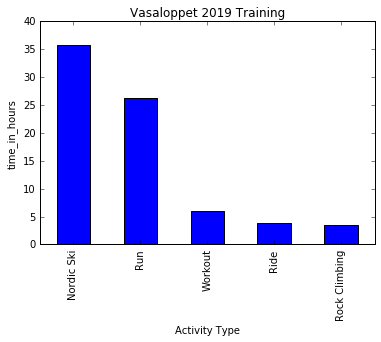

In [2]:
create_bar_chart(get_activities_by_date(2018, 9, 1, 2019, 2, 28), "time_in_hours", "Vasaloppet 2019 Training")


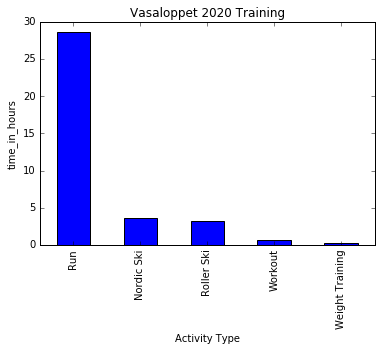

In [3]:
create_bar_chart(get_activities_by_date(2019, 9, 1, 2020, 2, 28), "time_in_hours", "Vasaloppet 2020 Training")

# vasaloppet_2020_training = get_activities_by_date(2019, 9, 1, 2020, 2, 28)

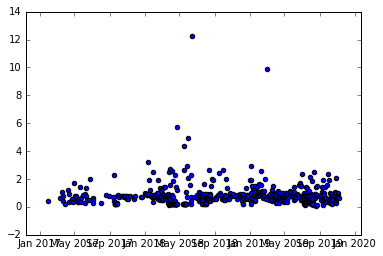

In [4]:
plt.scatter(x='activity_date', y='time_in_hours', data=activities)

(array([  1.,   6.,  15.,  29.,  34.,  36.,  46.,  57.,  64.,  66.,  85.,
        106., 142., 162., 183., 199., 224., 234., 247., 257., 274., 294.,
        309., 331., 350., 370., 408., 437., 460., 481.]),
 array([736359.75208333, 736393.38368519, 736427.01528704, 736460.64688889,
        736494.27849074, 736527.91009259, 736561.54169444, 736595.1732963 ,
        736628.80489815, 736662.4365    , 736696.06810185, 736729.6997037 ,
        736763.33130556, 736796.96290741, 736830.59450926, 736864.22611111,
        736897.85771296, 736931.48931481, 736965.12091667, 736998.75251852,
        737032.38412037, 737066.01572222, 737099.64732407, 737133.27892593,
        737166.91052778, 737200.54212963, 737234.17373148, 737267.80533333,
        737301.43693519, 737335.06853704, 737368.70013889]),
 <a list of 30 Patch objects>)

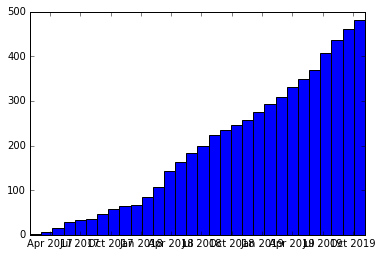

In [5]:
plt.hist(activities['activity_date'], bins=30, cumulative=True)

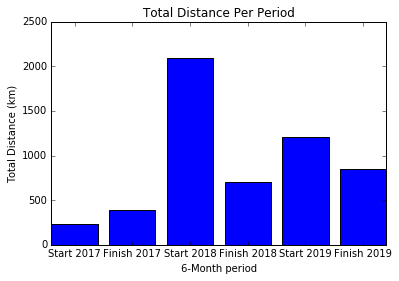

In [6]:
distance_dict = {"Start 2017":  total_distance(get_activities_by_date(2017, 1, 1, 2017, 6, 30)), 
                   "Finish 2017": total_distance(get_activities_by_date(2017, 7, 1, 2017, 12, 31)),
                   "Start 2018":  total_distance(get_activities_by_date(2018, 1, 1, 2018, 6, 30)),               
                   "Finish 2018": total_distance(get_activities_by_date(2018, 7, 1, 2018, 12, 31)),
                   "Start 2019":  total_distance(get_activities_by_date(2019, 1, 1, 2019, 6, 30)),              
                   "Finish 2019": total_distance(get_activities_by_date(2019, 7, 1, 2019, 12, 31))}

time_dict = {"Start 2017":  total_time_hours(get_activities_by_date(2017, 1, 1, 2017, 6, 30)), 
                   "Finish 2017": total_time_hours(get_activities_by_date(2017, 7, 1, 2017, 12, 31)),
                   "Start 2018":  total_time_hours(get_activities_by_date(2018, 1, 1, 2018, 6, 30)),               
                   "Finish 2018": total_time_hours(get_activities_by_date(2018, 7, 1, 2018, 12, 31)),
                   "Start 2019":  total_time_hours(get_activities_by_date(2019, 1, 1, 2019, 6, 30)),              
                   "Finish 2019": total_time_hours(get_activities_by_date(2019, 7, 1, 2019, 12, 31))}

plt.bar(distance_dict.keys(), distance_dict.values())
plt.title("Total Distance Per Period")
plt.xlabel("6-Month period", fontsize=10)
plt.ylabel("Total Distance (km)", fontsize=10)
plt.show()

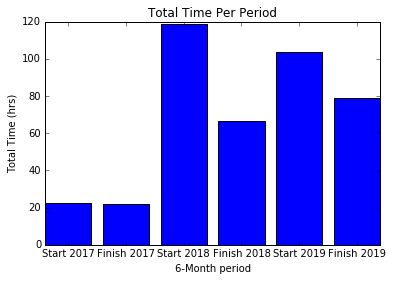

In [7]:
plt.bar(time_dict.keys(), time_dict.values())
plt.title("Total Time Per Period")
plt.xlabel("6-Month period", fontsize=10)
plt.ylabel("Total Time (hrs)", fontsize=10)
plt.show()